In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="ticks", context="talk")
from scipy.stats import ks_2samp

%matplotlib inline

In [5]:
nure = pd.read_csv("J:/Geology/WSGS/Projects/Critical Minerals/nure.csv")
dataColumns = [
    "u_dn_ppm",
    "u_fl_ppm",
    "ag_ppm",
    "al_pct",
    "as_ppm",
    "au_ppm",
    "b_ppm",
    "ba_ppm",
    "be_ppm",
    "bi_ppm",
    "ca_pct",
    "cd_ppm",
    "ce_ppm",
    "cl_ppm",
    "co_ppm",
    "cr_ppm",
    "cs_ppm",
    "cu_ppm",
    "dy_ppm",
    "eu_ppm",
    "fe_pct",
    "hf_ppm",
    "k_pct",
    "la_ppm",
    "li_ppm",
    "lu_ppm",
    "mg_pct",
    "mn_ppm",
    "mo_ppm",
    "na_pct",
    "nb_ppm",
    "ni_ppm",
    "p_ppm",
    "pb_ppm",
    "rb_ppm",
    "sb_ppm",
    "sc_ppm",
    "se_ppm",
    "sm_ppm",
    "sn_ppm",
    "sr_ppm",
    "ta_ppm",
    "tb_ppm",
    "th_ppm",
    "ti_ppm",
    "v_ppm",
    "w_ppm",
    "y_ppm",
    "yb_ppm",
    "zn_ppm",
    "zr_ppm",
]
for j in range(len(dataColumns)):
    news = []
    for i in range(len(nure[dataColumns[j]])):
        if nure[dataColumns[j]][i] < 0:
            news.append(
                np.random.randint(0, np.ceil(abs(nure[dataColumns[j]][i])))
            )
        else:
            news.append(nure[dataColumns[j]][i])
    nure[dataColumns[j]] = news

C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\envs\machinelearning\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (19,20,28,29,31,35,46,47,48,66,68,79,145) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
# read in generated data
# read in original data, this is the nure variable
# read in validation index
# use validation index to get generated data and add to new df
# use validation index to get original data and add to new df
imputedValues = []
correctValues = []
for i in range(len(dataColumns)):
    generated = pd.read_csv(
        "J:/Geology/WSGS/Projects/Critical Minerals/validation sets/"
        + str(dataColumns[i])
        + "_generated.csv"
    )
    indicies = pd.read_csv(
        "J:/Geology/WSGS/Projects/Critical Minerals/validation sets/validation_index "
        + str(dataColumns[i])
        + ".csv"
    )
    imputedValues.append(
        generated.loc[indicies.iloc[0:, 1].values][dataColumns[i]]
    )
    correctValues.append(
        nure.loc[indicies.iloc[0:, 1].values][dataColumns[i]].values
    )

Text(0, 0.5, 'Actual Values')

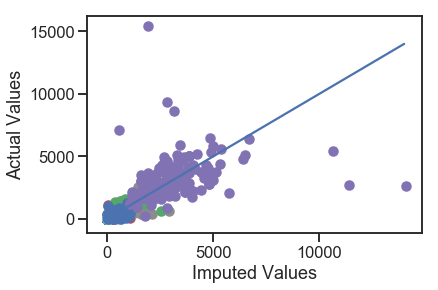

In [7]:
for i in range(len(dataColumns)):
    plt.scatter(imputedValues[i], correctValues[i])
plt.plot(range(14000))
plt.xlabel("Imputed Values")
plt.ylabel("Actual Values")

In [8]:
from sklearn.metrics import mean_absolute_error

mae = []
meanscorrect = []
meansimputed = []
ks_results = []
for i in range(len(dataColumns)):
    mae.append(mean_absolute_error(correctValues[i], imputedValues[i].values))
    meanscorrect.append(np.mean(correctValues[i]))
    meansimputed.append(np.mean(imputedValues[i]))
    ks_results.append(ks_2samp(imputedValues[i], correctValues[i]))

C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\envs\machinelearning\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\envs\machinelearning\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


Text(0.5, 0, 'Lu Concentration (ppm)')

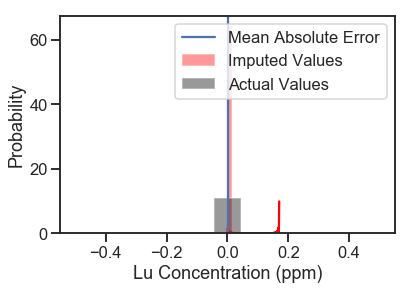

In [16]:
sns.distplot(imputedValues[5], label="Imputed Values", color="red")
sns.distplot(correctValues[5], label="Actual Values", color="black")
plt.axvline(mae[5], label="Mean Absolute Error")
plt.legend()
plt.ylabel("Probability")
plt.xlabel("Lu Concentration (ppm)")

In [26]:
ks_results[5]

Ks_2sampResult(statistic=0.007936507936507908, pvalue=0.9999999999999999)

C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.war

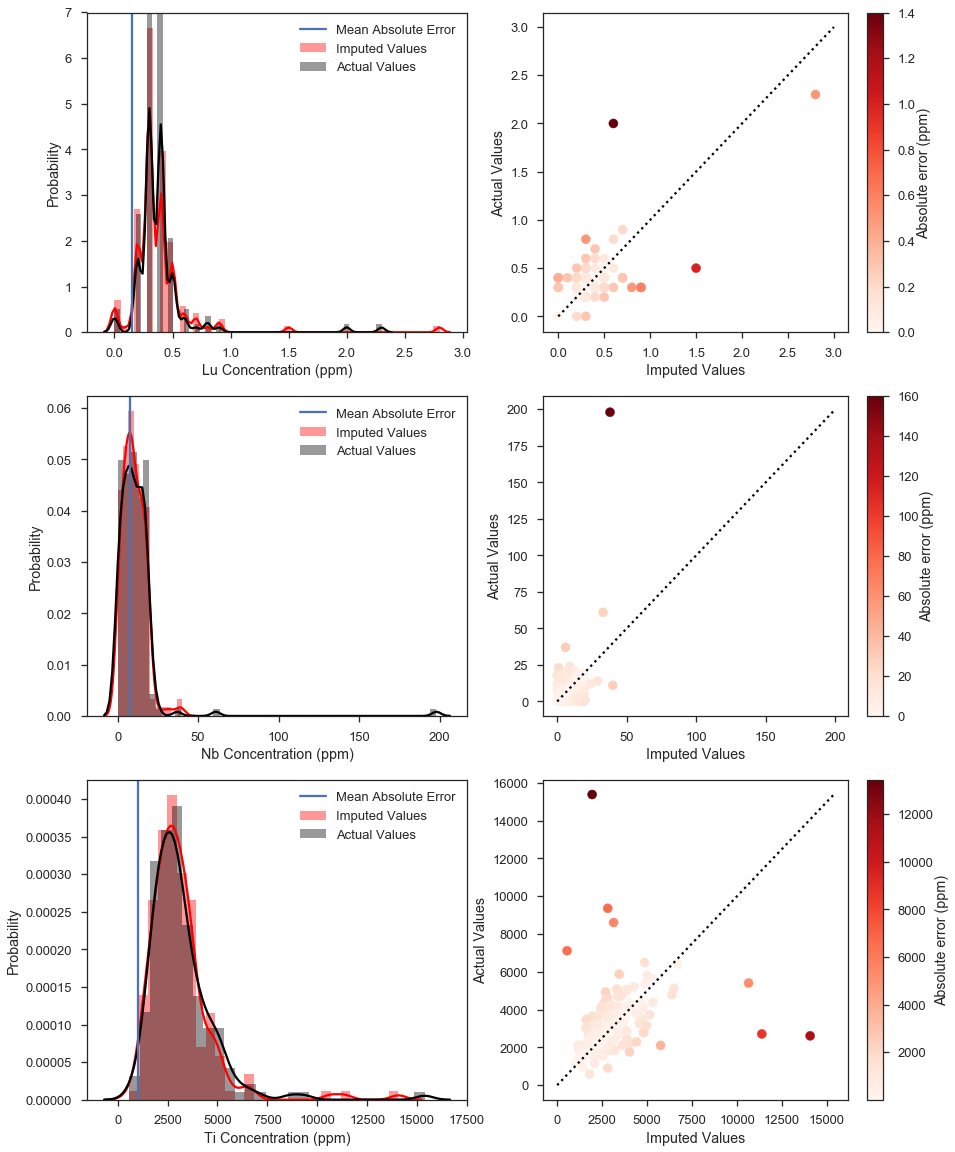

In [57]:
f, axs = plt.subplots(3, 2, figsize=(15, 20))
plt.rcParams["font.size"] = 8
plt.subplot(321)
sns.distplot(imputedValues[25], label="Imputed Values", color="red")
sns.distplot(correctValues[25], label="Actual Values", color="black")
plt.axvline(mae[25], label="Mean Absolute Error")
plt.legend()
plt.ylabel("Probability", fontname="Arial")
plt.xlabel("Lu Concentration (ppm)", fontname="Arial")

plt.subplot(322)
plt.scatter(
    imputedValues[25],
    correctValues[25],
    c=abs(imputedValues[25] - correctValues[25]).values,
    cmap="Reds",
)
cbar = plt.colorbar()
cbar.set_label("Absolute error (ppm)", labelpad=+1)
plt.plot(range(np.int(np.max(correctValues[25])) + 2), c="k", linestyle=":")
plt.xlabel("Imputed Values", fontname="Arial")
plt.ylabel("Actual Values", fontname="Arial")

plt.subplot(323)
sns.distplot(imputedValues[30], label="Imputed Values", color="red")
sns.distplot(correctValues[30], label="Actual Values", color="black")
plt.axvline(mae[30], label="Mean Absolute Error")
plt.legend()
plt.ylabel("Probability", fontname="Arial")
plt.xlabel("Nb Concentration (ppm)", fontname="Arial")

plt.subplot(324)
plt.scatter(
    imputedValues[30],
    correctValues[30],
    c=abs(imputedValues[30] - correctValues[30]).values,
    cmap="Reds",
)
cbar = plt.colorbar()
cbar.set_label("Absolute error (ppm)", labelpad=+1)
plt.plot(range(np.int(np.max(correctValues[30])) + 2), c="k", linestyle=":")
plt.xlabel("Imputed Values", fontname="Arial")
plt.ylabel("Actual Values", fontname="Arial")

plt.subplot(325)
sns.distplot(imputedValues[-7], label="Imputed Values", color="red")
sns.distplot(correctValues[-7], label="Actual Values", color="black")
plt.axvline(mae[-7], label="Mean Absolute Error")
plt.legend()
plt.ylabel("Probability", fontname="Arial")
plt.xlabel("Ti Concentration (ppm)", fontname="Arial")

plt.subplot(326)
plt.scatter(
    imputedValues[-7],
    correctValues[-7],
    c=abs(imputedValues[-7] - correctValues[-7]).values,
    cmap="Reds",
)
cbar = plt.colorbar()
cbar.set_label("Absolute error (ppm)", labelpad=+1)
plt.plot(range(np.int(np.max(correctValues[-7])) + 2), c="k", linestyle=":")
plt.xlabel("Imputed Values", fontname="Arial")
plt.ylabel("Actual Values", fontname="Arial")

plt.savefig(
    "J:/Geology/WSGS/Projects/Critical Minerals/Report/v 0.2.0/Figures/figure 4.pdf"
)